Step1: Importing Data

In [378]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [379]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [380]:
#setting the display 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [381]:
#Reading the dataset

data=pd.read_csv('Leads.csv')

Step2: Inspecting the Dataframe

In [382]:
#Inspecting first 5 rows

data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [383]:
#Checking the dimensions of the dataframe

data.shape

(9240, 37)

In [384]:
#Checking statistical aspects of the dataframe

data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Step 3 : Data Preparation

Checking for duplicate rows and dropping them

In [386]:
#check for duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [387]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

-->No duplicates found

Dropping columns by evaluating null values



In [388]:
#Identifying if any column exists with only null values
data.isnull().all(axis=0).any()

False

In [389]:

# Dropping all columns with only 0 values
data.loc[:, (data != 0).any(axis=0)]
data.shape

(9240, 37)

In [390]:
#Retrieving the count of unique values for each column
data.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                 10
City                                                7
Lead Profile                                        6
What is your current occupation                     6
Lead Quality                                        5
Lead Origin                 

In [391]:
#dropping columns with 1 unique values 

data=data.loc[:,data.nunique()!=1]
data.shape



(9240, 32)

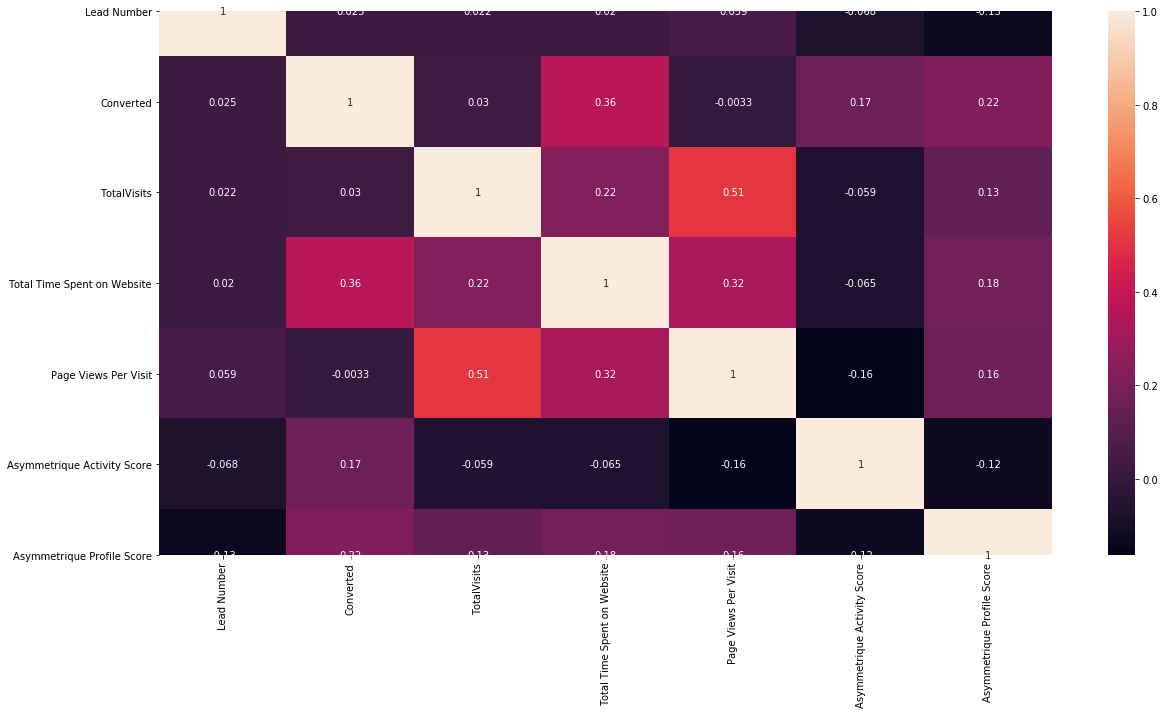

In [392]:
#correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [393]:
#analysing columns with 2 unique values
var=['Do Not Email',                                       
'Do Not Call',                                         
'Converted',                                           
'Newspaper Article',                                   
'Search',                                              
'A free copy of Mastering The Interview',              
'X Education Forums',                                  
'Newspaper',                                           
'Digital Advertisement',                               
'Through Recommendations']

    
for i in var:
    print(data[i].value_counts(dropna=False))
    print()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

0    5679
1    3561
Name: Converted, dtype: int64

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

No     9226
Yes      14
Name: Search, dtype: int64

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

No     9239
Yes       1
Name: X Education Forums, dtype: int64

No     9239
Yes       1
Name: Newspaper, dtype: int64

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

No     9233
Yes       7
Name: Through Recommendations, dtype: int64



In [394]:
#Dropping prosepect id as Lead number can be used as the unique identifier 
#Prospect ID  has 9240 unique values
#Lead Number has 9240 unique values

data=data.drop('Prospect ID',axis=1)
data.shape

(9240, 31)

In [395]:
#Droping  Asymmetrique Activity Score ,Asymmetrique Profile Score as it is represented by Asymmetrique Activity Index
#and Asymmetrique Profile index columns

data=data.drop('Asymmetrique Activity Score',axis=1)
data=data.drop('Asymmetrique Profile Score', axis=1 )
data.shape

(9240, 29)

In [396]:
#Checking the coloumns after dropping the unnecessary columns
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [397]:
#Checking the first five rows after dropping the unnecessary columns
data.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization How did you hear about X Education  \
0                   Select                             Select   
1                   Select                             Select   
2  Business Administration                             Select   
3    Media and Advertising                      Word Of Mouth   
4                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No     

Converting binary varaiables(Yes/No) to 1/0

In [398]:
#List of variables to map for conversion to zeroes and ones
varlist=['Do Not Email', 'Do Not Call','Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations',
        'A free copy of Mastering The Interview']
varlist

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [399]:
#checkign the values in 'varlist'
for i in varlist:
    print(data[i].value_counts(dropna=False))
    print()
    
  

No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

No     9226
Yes      14
Name: Search, dtype: int64

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

No     9239
Yes       1
Name: X Education Forums, dtype: int64

No     9239
Yes       1
Name: Newspaper, dtype: int64

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64



In [400]:
#Defining the function  convert binary variables 
def binary_conv(x):
    return x.map({'Yes':1,'No':0})
    
#Applying the function to the varlist

data[varlist]=data[varlist].apply(binary_conv)

In [401]:
#Checking the rows after binary variable conversion to zeroes and ones
data.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization How did you hear about X Education  \
0                   Select                             Select   
1                   Select                             Select   
2  Business Administration                             Select   
3    Media and Advertising                      Word Of Mouth   
4                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index  A free copy of Mastering The Interview  \
0                  02.Medium                                       0   
1                  02.Medium                                       0   
2                    01.High                                       1   
3                    01.High                                       0   
4                    01.High                                       0   

  Last Notable Activity  
0              Modified  

In [402]:
#Creating dummy values 
dummy1=pd.get_dummies(data[['Asymmetrique Activity Index','Asymmetrique Profile Index']],drop_first=True)
data=pd.concat([data,dummy1],axis=1)

In [403]:
data.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization How did you hear about X Education  \
0                   Select                             Select   
1                   Select                             Select   
2  Business Administration                             Select   
3    Media and Advertising                      Word Of Mouth   
4                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index  A free copy of Mastering The Interview  \
0                  02.Medium                                       0   
1                  02.Medium                                       0   
2                    01.High                                       1   
3                    01.High                                       0   
4                    01.High                                       0   

  Last Notable Activity  Asymmetrique Activity Inde

In [404]:
data['Asymmetrique Activity Index_02.Medium'].value_counts(dropna=False)


0    5401
1    3839
Name: Asymmetrique Activity Index_02.Medium, dtype: int64

In [405]:
#Checking Null values

total_cnt = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Total_cnt'])
percentage = pd.DataFrame(round(100*(data.isnull().sum()/data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total_cnt, percentage], axis = 1)

Total_cnt  Percentage
Lead Quality                                        4767       51.59
Asymmetrique Profile Index                          4218       45.65
Asymmetrique Activity Index                         4218       45.65
Tags                                                3353       36.29
Lead Profile                                        2709       29.32
What matters most to you in choosing a course       2709       29.32
What is your current occupation                     2690       29.11
Country                                             2461       26.63
How did you hear about X Education                  2207       23.89
Specialization                                      1438       15.56
City                                                1420       15.37
TotalVisits                                          137        1.48
Page Views Per Visit                                 137        1.48
Last Activity                                        103        1.11
Lead Source                                           36        0.39
Do Not Call                                            0        0.00
Converted                                              0        0.00
Total Time Spent on Website                            0        0.00
Do Not Email                                           0        0.00
Lead Origin                                            0        0.00
Asymmetrique Profile Index_03.Low                      0        0.00
Newspaper Article                                      0        0.00
Search                                                 0        0.00
Asymmetrique Profile Index_02.Medium                   0        0.00
X Education Forums                                     0        0.00
Newspaper                                              0        0.00
Digital Advertisement                                  0        0.00
Through Recommendations                                0        0.00
A free copy of Mastering The Interview                 0        0.00
Last Notable Activity                                  0        0.00
Asymmetrique Activity Index_02.Medium                  0        0.00
Asymmetrique Activity Index_03.Low                     0        0.00
Lead Number                                            0        0.00

In [406]:
# Dropping columns that have high percentage of null values .
drop_col=['Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Quality']
for col in drop_col:
    data.drop(col,axis=1,inplace=True)

In [407]:
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Activity Index_03.Low',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low'],
      dtype='object')

In [408]:
data.shape

(9240, 30)

In [409]:
#renaming columns
data.rename(columns={'What matters most to you in choosing a course':'Reason for choosing a course','What is your current occupation':'Occupation'
                          }, 
                 inplace=True)
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Occupation', 'Reason for choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Activity Index_03.Low',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low'],
      dtype='object')

In [410]:
#Checking total null value counts and respective percentages  

total_cnt = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Total_cnt'])
percentage = pd.DataFrame(round(100*(data.isnull().sum()/data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total_cnt, percentage], axis = 1)

Total_cnt  Percentage
Tags                                         3353       36.29
Lead Profile                                 2709       29.32
Reason for choosing a course                 2709       29.32
Occupation                                   2690       29.11
Country                                      2461       26.63
How did you hear about X Education           2207       23.89
Specialization                               1438       15.56
City                                         1420       15.37
TotalVisits                                   137        1.48
Page Views Per Visit                          137        1.48
Last Activity                                 103        1.11
Lead Source                                    36        0.39
Do Not Email                                    0        0.00
Do Not Call                                     0        0.00
Lead Origin                                     0        0.00
Converted                                       0        0.00
Total Time Spent on Website                     0        0.00
Asymmetrique Profile Index_03.Low               0        0.00
Asymmetrique Profile Index_02.Medium            0        0.00
Search                                          0        0.00
Newspaper Article                               0        0.00
X Education Forums                              0        0.00
Newspaper                                       0        0.00
Digital Advertisement                           0        0.00
Through Recommendations                         0        0.00
A free copy of Mastering The Interview          0        0.00
Last Notable Activity                           0        0.00
Asymmetrique Activity Index_02.Medium           0        0.00
Asymmetrique Activity Index_03.Low              0        0.00
Lead Number                                     0        0.00

In [411]:
# Inspecting the variable Tags which has the highest null values (3353) which is 36.29%
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [412]:
#Converting NAN to unknown for 'Tags' variable


data['Tags'].fillna("Unknown", inplace = True)
data['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [413]:
#Lead Profile variable : Select has the highest count followed by NAN
data['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [414]:
#Converting NAN to unknown-Lead Profile


data['Lead Profile'].fillna("Unknown", inplace = True)
data['Lead Profile'].value_counts()

Select                         4146
Unknown                        2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [415]:
#Converting select to unkonown -Lead profile

data['Lead Profile'].replace('Select', 'Unknown',inplace = True)
data['Lead Profile'].value_counts()


Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [416]:
#Inspecting the unique values in variable 'c'	

data['Reason for choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: Reason for choosing a course, dtype: int64

In [417]:
#Reason for choosing a course : imputing the null values with unknown 

data['Reason for choosing a course'].fillna("Unknown", inplace = True)
data['Reason for choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: Reason for choosing a course, dtype: int64

In [418]:
#Occupation variable -checking unique values and counts
data['Occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [419]:
#Occupation variable -Converting nan to unemployed
data['Occupation'].fillna("Unemployed", inplace = True)
data['Occupation'].value_counts(dropna=False)


Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [420]:
#Country variable -checking unique values and counts
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Philippines                2
China                      2
Asia/Pacific Region        2
Ghana                      2
Netherlands                2
Uganda                     2
Bangladesh                 2
Italy                      2
Tanzania                   1
Russia                     1
Denmark                    1
Vietnam                    1
Liberia                    1
Sri Lanka     

In [421]:
# Country variable : Nan to India i.e imputing with mode value

data.loc[pd.isnull(data['Country']), ['Country']] = 'India'
#Categorising contry as India and Outside India
data['Country'] = data['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
data['Country'].value_counts(dropna=False)

India            8953
Outside India     287
Name: Country, dtype: int64

In [422]:
#How did you hear about X Education variable 	

data['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [423]:
#dropping the column as more % of 'Select' , 'Nan ' 

data = data.drop('How did you hear about X Education', axis=1)
data.shape

(9240, 29)

In [424]:
#Specialization

data['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [425]:
#imputing nan with 'unknown'

data['Specialization'].fillna("Unknown", inplace = True)
data['Specialization'].value_counts(dropna=False)


Select                               1942
Unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [426]:
data.Specialization.describe()

count       9240
unique        20
top       Select
freq        1942
Name: Specialization, dtype: object

In [427]:
#Converting select to unkonown -Lead profile

data['Specialization'].replace('Select', 'Unknown',inplace = True)
data['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [428]:
#City

data['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [429]:
#converting nan and Selcet to unknown

data['City'].fillna("Unknown", inplace = True)
data['City'].replace('Select', 'Unknown',inplace = True)
data['City'].value_counts(dropna=False)

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [430]:
#TotalVisits	137	1.48
#Page Views Per Visit	137	1.48
#Last Activity	103	1.11
#Lead Source	36	0.39


var4=['TotalVisits','Page Views Per Visit','Last Activity','Lead Source']

for i in var4:
    print(data[i].value_counts(dropna=False))
    print()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1

In [431]:
#imputing with medians


data['TotalVisits'].replace(np.NaN, data['TotalVisits'].median(), inplace =True)
data['Page Views Per Visit'].replace(np.NaN, data['Page Views Per Visit'].median(), inplace =True)


In [432]:
data['Lead Source'].fillna("Other", inplace = True)
data['Last Activity'].fillna("Unknown", inplace = True)
data['Last Activity'].value_counts(dropna=False)




Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [433]:
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Other                  36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
testone                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [434]:
# Rectifying spelling mistakes of column = Lead Source
def correcting(x):
    if x=='google':
        return 'Google'
    else:
        return x
    
data['Lead Source']=data['Lead Source'].apply(correcting)

In [435]:
# Converting numerical values in 'TotalVisits' column to int datatype
def conversion(x):
    x=str(x)
    if x =='nan':
        return x
    else:
        return int(float(x))
data['TotalVisits']=data['TotalVisits'].apply(conversion)

In [436]:
#Checking Null values after treatment

total_cnt = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Total_cnt'])
percentage = pd.DataFrame(round(100*(data.isnull().sum()/data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total_cnt, percentage], axis = 1)

Total_cnt  Percentage
Asymmetrique Profile Index_03.Low               0         0.0
Reason for choosing a course                    0         0.0
Lead Origin                                     0         0.0
Lead Source                                     0         0.0
Do Not Email                                    0         0.0
Do Not Call                                     0         0.0
Converted                                       0         0.0
TotalVisits                                     0         0.0
Total Time Spent on Website                     0         0.0
Page Views Per Visit                            0         0.0
Last Activity                                   0         0.0
Country                                         0         0.0
Specialization                                  0         0.0
Occupation                                      0         0.0
Search                                          0         0.0
Asymmetrique Profile Index_02.Medium            0         0.0
Newspaper Article                               0         0.0
X Education Forums                              0         0.0
Newspaper                                       0         0.0
Digital Advertisement                           0         0.0
Through Recommendations                         0         0.0
Tags                                            0         0.0
Lead Profile                                    0         0.0
City                                            0         0.0
A free copy of Mastering The Interview          0         0.0
Last Notable Activity                           0         0.0
Asymmetrique Activity Index_02.Medium           0         0.0
Asymmetrique Activity Index_03.Low              0         0.0
Lead Number                                     0         0.0

In [437]:
# Creating dummy values for the categorical variables
dummy1=pd.get_dummies(data[['Lead Origin','Lead Source','Country','Specialization','Occupation','Reason for choosing a course','Tags','Lead Profile','City','Last Notable Activity']],drop_first=True)
data=pd.concat([data,dummy1],axis=1)
#excluding'lead number' variable
#data.drop(['Lead Number','Lead Origin','Lead Source','Country','Specialization','Occupation','Reason for choosing a course','Tags','Lead Profile','City','Last Notable Activity','Last Activity'],axis=1,inplace=True)

data.drop(['Lead Origin','Lead Source','Country','Specialization','Occupation','Reason for choosing a course','Tags','Lead Profile','City','Last Notable Activity','Last Activity'],axis=1,inplace=True)

data.head()

Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0       660737             0            0          0            0   
1       660728             0            0          0            5   
2       660727             0            0          1            2   
3       660719             0            0          0            1   
4       660681             0            0          1            2   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      1                                   0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                     1                                  0   
1                                     1                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1   

In [438]:
#Checking  outliers

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number  Do Not Email  Do Not Call    Converted  TotalVisits  \
count    9240.000000   9240.000000  9240.000000  9240.000000  9240.000000   
mean   617188.435606      0.079437     0.000216     0.385390     3.438636   
std     23405.995698      0.270435     0.014711     0.486714     4.819024   
min    579533.000000      0.000000     0.000000     0.000000     0.000000   
25%    596484.500000      0.000000     0.000000     0.000000     1.000000   
50%    615479.000000      0.000000     0.000000     0.000000     3.000000   
75%    637387.250000      0.000000     0.000000     1.000000     5.000000   
90%    650506.100000      0.000000     0.000000     1.000000     7.000000   
95%    655404.050000      1.000000     0.000000     1.000000    10.000000   
99%    659592.980000      1.000000     0.000000     1.000000    17.000000   
max    660737.000000      1.000000     1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.357440     0.001515   
std                     548.021466              2.145781     0.038898   
min                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
90%                    1380.000000              5.000000     0.000000   
95%                    1562.000000              6.000000     0.000000   
99%                    1840.610000              9.000000     0.000000   
max                    2272.000000             55.000000     1.000000   

       Newspaper Article  X Education Forums    Newspaper  \
count        9240.000000         9240.000000  9240.000000   
mean            0.000216            0.000108     0.000108   
std             0.014711            0.010403     0.010403   
min             0.000000            0.000000     0.000000   
25%             0.000000            0.000000     0.000000   
50%             0.000000            0.000000     0.000000   
75%             0.000000            0.000000     0.000000   
90%             0.000000            0.000000     0.000000   
95%             0.000000            0.000000     0.000000   
99%             0.000000            0.000000     0.000000   
max             1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9240.000000              9240.000000   
mean                0.000433                 0.000758   
std                 0.020803                 0.027515   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
90%                 0.000000                 0.000000   
95%                 0.000000                 0.000000   
99%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       A free copy of Mastering The Interview  \
count                             9240.000000   
mean                                 0.312554   
std                                  0.463559   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
90%                                  1.000000   
95%                                  1.000000   
99%                                  1.000000   
max                                  1.000000   

       Asymmetrique Activity Index_02.Medium  \
count                            9240.000000   
mean                                0.415476   
std                                 0.492831   
min     

In [439]:
#CHECKING FOR OUTLIERS IN THE CONTINUOUS VARIABLES:TotalVisits,Total Time Spent on Website Page Views Per Visit

cont_var_outliers=data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]


cont_var_outliers.describe(percentiles=[.25,.5,.75,.90,.95,.99])


TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

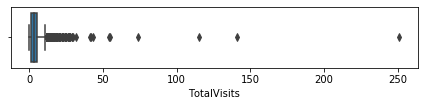

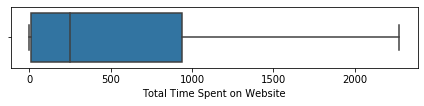

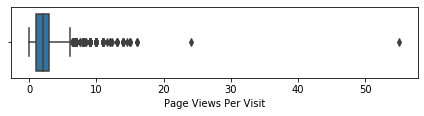

In [440]:
#removing outliers
#plt.figure(figsize=(40,50))

for i in enumerate(cont_var_outliers):    
    plt.subplot(3,1,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    plt.tight_layout()
    # display the plot
    plt.show()

In [441]:
#remove outliers using IQR

#rem_cont_var_outliers=['TotalVisits','Page Views Per Visit']

Q1=data['TotalVisits'].quantile(.25)
Q3=data['TotalVisits'].quantile(.75)

IQR=Q3-Q1
data=data.loc[(data['TotalVisits']>=Q1-1.5*IQR)&(data['TotalVisits']<=Q3+1.5*IQR)]


Q11=data['Page Views Per Visit'].quantile(.25)
Q31=data['Page Views Per Visit'].quantile(.75)

IQR1=Q31-Q11
data=data.loc[(data['Page Views Per Visit']>=Q11-1.5*IQR1)&(data['Page Views Per Visit']<=Q31+1.5*IQR1)]

   

In [442]:
data.shape

(8679, 121)

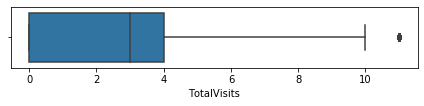

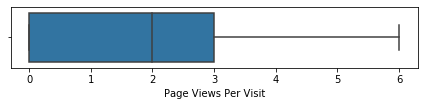

In [443]:

#checking variables after the removal of the ouliers
Var_outliers=['TotalVisits','Page Views Per Visit']

#plt.figure(figsize=(40,50))

for i in enumerate(Var_outliers):    
    plt.subplot(3,1,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    plt.tight_layout()
    # display the plot
    plt.show()

In [444]:
data.shape

(8679, 121)

Step 4 : Test-Train Split

In [445]:
from sklearn.model_selection import train_test_split

In [446]:
#Putting feature variable to X
X=data.drop(['Converted','Lead Number'],axis=1) #removing converted and lead number variables
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0            0                            0   
1             0            0            5                          674   
2             0            0            2                         1532   
3             0            0            1                          305   
4             0            0            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      1                                   0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                     1                                  0   
1                                     1                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3   

In [447]:
#Putting response variable to y 

y=data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [448]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

Step 5: Featuring Scaling

In [449]:
from sklearn.preprocessing import StandardScaler

In [450]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = 
scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
5182             0            0    -0.744673                    -0.770602   
8469             1            0    -0.332511                    -0.532344   
8382             0            0     0.079651                     1.685292   
8031             0            0     0.079651                    -0.081485   
6712             0            0     0.079651                     2.942563   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
5182             -0.650023       0                  0                   0   
8469             -0.045307       0                  0                   0   
8382             -0.347665       0                  0                   0   
8031              0.559408       0                  0                   0   
6712             -0.045307       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
5182          0                      0                        0   
8469          0                      0                        0   
8382          0                      0                        0   
8031          0                      0                        0   
6712          0                      0                        0   

      A free copy of Mastering The Interview  \
5182                                       0   
8469                                       1   
8382                                       0   
8031                                       0   
6712                                       0   

      Asymmetrique Activity Index_02.Medium  \
5182                                      0   
8469                                      1   
8382                                      1   
8031                                      1   
6712                                      0   

      Asymmetrique Activity Index_03.Low  \
5182                                   0   
8469                                   0   
8382                                   0   
8031                                   0   
6712                                   0   

      Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
5182                                     0                                  0   
8469                                     0                                  0   
8382                                     1                                  0   
8031                                     1                                  0   
6712                                     0                                  0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5182                                    0                          0   
8469                                    1                          0   
8382                                    0                          0   
8031                                    1                          0   
6712                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5182                        0                           0   
8469                        0                           0   
8382                        0                           0   
8031                        0                           0   
6712                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
5182                           0                     0                   1   
8469                           1                     0                   0   
8382                           0                     0                   1   
8031                           1                     0                   0   
6712                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
5182     

In [451]:
#checking conversion rate

conversion=(sum(data['Converted'])/len(data['Converted'].index))*100
conversion

38.391519760341055

38% conversion rate

Step 6: Correlations

In [452]:
data.corr()

Lead Number  Do Not Email  \
Lead Number                                            1.000000     -0.094885   
Do Not Email                                          -0.094885      1.000000   
Do Not Call                                            0.012333     -0.004395   
Converted                                              0.028945     -0.131819   
TotalVisits                                            0.055793     -0.022136   
Total Time Spent on Website                            0.024591     -0.042049   
Page Views Per Visit                                   0.070785      0.009321   
Search                                                -0.022970     -0.008792   
Newspaper Article                                           NaN           NaN   
X Education Forums                                          NaN           NaN   
Newspaper                                              0.004766     -0.003107   
Digital Advertisement                                 -0.018641     -0.004395   
Through Recommendations                               -0.006804     -0.006216   
A free copy of Mastering The Interview                -0.108882      0.050369   
Asymmetrique Activity Index_02.Medium                  0.186947     -0.031054   
Asymmetrique Activity Index_03.Low                     0.028189      0.039789   
Asymmetrique Profile Index_02.Medium                   0.146856     -0.029307   
Asymmetrique Profile Index_03.Low                      0.015633     -0.000080   
Lead Origin_Landing Page Submission                   -0.069861      0.093839   
Lead Origin_Lead Add Form                              0.029321     -0.019047   
Lead Origin_Lead Import                                0.107728     -0.017418   
Lead Origin_Quick Add Form                             0.008022      0.037084   
Lead Source_Direct Traffic                            -0.144932      0.111304   
Lead Source_Facebook                                   0.105353     -0.017418   
Lead Source_Google                                     0.131719     -0.066480   
Lead Source_Live Chat                                  0.012563     -0.004395   
Lead Source_NC_EDM                                    -0.015717     -0.003107   
Lead Source_Olark Chat                                -0.071965     -0.050710   
Lead Source_Organic Search                            -0.008778      0.027187   
Lead Source_Other                                     -0.004280      0.068576   
Lead Source_Pay per Click Ads                          0.015060     -0.003107   
Lead Source_Press_Release                             -0.011331      0.037084   
Lead Source_Reference                                  0.025658     -0.037896   
Lead Source_Referral Sites                             0.165669     -0.008622   
Lead Source_Social Media                              -0.000599     -0.004395   
Lead Source_WeLearn                                    0.011987     -0.003107   
Lead Source_Welingak Website                           0.014130      0.000337   
Lead Source_bing                                       0.013522     -0.007614   
Lead Source_blog                                       0.015314     -0.003107   
Lead Source_testone                                   -0.003485     -0.003107   
Lead Source_welearnblog_Home                           0.006867     -0.003107   
Lead Source_youtubechannel                             0.003930      0.037084   
Country_Outside India                                 -0.031452      0.053068   
Specialization_Business Administration                -0.009927      0.004941   
Specialization_E-Business                              0.005587      0.005477   
Specialization_E-COMMERCE                             -0.002307      0.026226   
Specialization_Finance Management                     -0.011803     -0.008170   
Specialization_Healthcare Management                  -0.004047      0.011180   
Specialization_Hospitality Management                  0.001022      0.014944   
Sp

Running Taining model

In [453]:
import statsmodels.api as sm


In [454]:
#Logestic Regression model

logml=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     5961
Model Family:                Binomial   Df Model:                          113
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        21:30:11   Pearson chi2:                 2.58e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.342e+16   1.02e+08   1.32e+08      0.000    1.34e+16    1.34e+16
Do Not Email                                           -3.294e+14   3.76e+06  -8.75e+07      0.000   -3.29e+14   -3.29e+14
Do Not Call                                             2.713e+16   6.74e+07   4.02e+08      0.000    2.71e+16    2.71e+16
TotalVisits                                             9.511e+13   1.43e+06   6.63e+07      0.000    9.51e+13    9.51e+13
Total Time Spent on Website                             3.001e+14   1.06e+06   2.84e+08      0.000       3e+14       3e+14
Page Views Per Visit                                   -1.123e+14   1.59e+06  -7.06e+07      0.000   -1.12e+14   -1.12e+14
Search                                                  1.101e+15    3.4e+07   3.24e+07      0.000     1.1e+15     1.1e+15
Newspaper Article                                       -766.4390   1.67e-06   -4.6e+08      0.000    -766.439    -766.439
X Education Forums                                       802.2758   2.25e-06   3.57e+08      0.000     802.276     802.276
Newspaper                                               -2.82e+16   6.76e+07  -4.17e+08      0.000   -2.82e+16   -2.82e+16
Digital Advertisement                                   2.529e+16   6.75e+07   3.75e+08      0.000    2.53e+16    2.53e+16
Through Recommendations                                -5.067e+14   3.78e+07  -1.34e+07      0.000   -5.07e+14   -5.07e+14
A free copy of Mastering The Interview                 -2.487e+13   2.93e+06  -8.49e+06      0.000   -2.49e+13   -2.49e+13
Asymmetrique Activity Index_02.Medium                   8.924e+12   2.26e+06   3.95e+06      0.000    8.92e+12    8.92e+12
Asymmetrique Activity Index_03.Low                     -7.732e+14   4.95e+06  -1.56e+08      0.000   -7.73e+14   -7.73e+14
Asymmetrique Profile Index_02.Medium                    1.062e+14   2.74e+06   3.88e+07      0.000    1.06e+14    1.06e+14
Asymmetrique Profile Index_03.Low                       4.666e+14   1.75e+07   2.66e+07      0.000    4.67e+14    4.67e+14
Lead Origin_Landing Page Submission                     -8.11e+13   4.12e+06  -1.97e+07      0.000   -8.11e+13   -8.11e+13
Lead Origin_Lead Add Form                               -6.68e+14   4.35e+07  -1.53e+07      0.000   -6.68e+14   -6.68e+14
Lead Origin_Lead Import                                 1.282e+15   5.35e+07    2.4e+07      0.000    1.28e+15    1.28e+15
Lead Origin_Quick Add Form                              2.863e+15   8.08e+07   3.54e+07      0.000    2.86e+15    2.86e+15
Lead Source_Direct Traffic                             -9.695e+15   6.47e+07   -1.5e+08      0.000   -9.69e+15   -9.69e+15
Lead Sou

Step8: FEATURE SELECTION USING RFE

In [455]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [456]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,20)
rfe=rfe.fit(X_train,y_train)

In [459]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False])

In [460]:
#Rankingthe features selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 89),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 15),
 ('Newspaper Article', False, 96),
 ('X Education Forums', False, 95),
 ('Newspaper', False, 73),
 ('Digital Advertisement', False, 87),
 ('Through Recommendations', False, 82),
 ('A free copy of Mastering The Interview', False, 60),
 ('Asymmetrique Activity Index_02.Medium', False, 39),
 ('Asymmetrique Activity Index_03.Low', True, 1),
 ('Asymmetrique Profile Index_02.Medium', False, 74),
 ('Asymmetrique Profile Index_03.Low', False, 71),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 18),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Origin_Quick Add Form', False, 68),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 94),
 ('Lead Source_NC_EDM', Fa

In [461]:
col=X_train.columns[rfe.support_]

In [462]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Sou

Assessing the model with StatsModels

In [463]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1136.1
Date:                Mon, 02 Mar 2020   Deviance:                       2272.2
Time:                        21:30:48   Pearson chi2:                 8.95e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4286      0.286    -11.971      0.000      -3.990      -2.867
Asymmetrique Activity Index_03.Low          -2.2908      0.390     -5.872      0.000      -3.055      -1.526
Lead Source_Welingak Website                 3.7523      1.034      3.629      0.000       1.726       5.779
Reason for choosing a course_Unknown        -2.6528      0.151    -17.625      0.000      -2.948      -2.358
Tags_Busy                                    2.3367      0.371      6.302      0.000       1.610       3.063
Tags_Closed by Horizzon                      8.2456      0.773     10.668      0.000       6.731       9.761
Tags_Interested in Next batch               26.1530   9.66e+04      0.000      1.000   -1.89e+05    1.89e+05
Tags_Interested in other courses            -0.6009      0.507     -1.185      0.236      -1.594       0.393
Tags_Lateral student                        28.9946   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Tags_Lost to EINS                            8.7998      0.686     12.827      0.000       7.455      10.144
Tags_Not doing further education           -22.2585   2.17e+04     -0.001      0.999   -4.26e+04    4.25e+04
Tags_Ringing                                -1.7830      0.371     -4.805      0.000      -2.510      -1.056
Tags_Unknown                                 3.4703      0.310     11.197      0.000       2.863       4.078
Tags_Will revert after reading the email     6.3662      0.328     19.408      0.000       5.723       7.009
Tags_invalid number                        -23.7595   2.75e+04     -0.001      0.999   -5.38e+04    5.38e+04
Tags_number not provided                   -23.8572   4.49e+04     -0.001      1.000    -8.8e+04     8.8e+04
Tags_switched off                           -2.3176      0.664     -3.488      0.000      -3.620      -1.015
Tags_wrong number given                    -23.6013    3.6e+04     -0.001      0.999   -7.06e+04    7.06e+04
Lead Profile_Student of SomeSchool          -2.7326      0.933     -2.928      0.003      -4.562      -0.903
Last Notable Activity_SMS Sent               2.8416      0.143     19.811      0.000       2.560       3.123
Last Notable Activity_Unsubscribed           1.2712      0.689      1.846      0.065      -0.078       2.621
============================================================================================================
"""

Dropping columns with high p values

In [464]:
X_train=X_train[col]
X_train.drop('Tags_Interested in Next batch',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1140.8
Date:                Mon, 02 Mar 2020   Deviance:                       2281.6
Time:                        21:30:56   Pearson chi2:                 9.20e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2204      0.254    -12.675      0.000      -3.718      -2.722
Asymmetrique Activity Index_03.Low          -2.3002      0.389     -5.910      0.000      -3.063      -1.537
Lead Source_Welingak Website                 3.7554      1.034      3.631      0.000       1.728       5.783
Reason for choosing a course_Unknown        -2.6638      0.151    -17.630      0.000      -2.960      -2.368
Tags_Busy                                    2.1077      0.346      6.085      0.000       1.429       2.787
Tags_Closed by Horizzon                      8.0440      0.762     10.550      0.000       6.550       9.538
Tags_Interested in other courses            -0.8152      0.490     -1.665      0.096      -1.775       0.144
Tags_Lateral student                        28.7864   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Tags_Lost to EINS                            8.6055      0.674     12.769      0.000       7.285       9.926
Tags_Not doing further education           -22.4729   2.17e+04     -0.001      0.999   -4.25e+04    4.25e+04
Tags_Ringing                                -2.0340      0.345     -5.902      0.000      -2.709      -1.359
Tags_Unknown                                 3.2576      0.280     11.627      0.000       2.708       3.807
Tags_Will revert after reading the email     6.1569      0.300     20.503      0.000       5.568       6.746
Tags_invalid number                        -24.0050   2.74e+04     -0.001      0.999   -5.37e+04    5.36e+04
Tags_number not provided                   -24.1054   4.48e+04     -0.001      1.000   -8.78e+04    8.77e+04
Tags_switched off                           -2.5703      0.650     -3.954      0.000      -3.844      -1.296
Tags_wrong number given                    -23.8466   3.59e+04     -0.001      0.999   -7.04e+04    7.04e+04
Lead Profile_Student of SomeSchool          -2.7934      0.908     -3.077      0.002      -4.573      -1.014
Last Notable Activity_SMS Sent               2.8909      0.143     20.210      0.000       2.611       3.171
Last Notable Activity_Unsubscribed           1.2742      0.688      1.852      0.064      -0.074       2.623
============================================================================================================
"""

In [465]:
X_train.drop('Tags_Lateral student',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1147.2
Date:                Mon, 02 Mar 2020   Deviance:                       2294.4
Time:                        21:31:06   Pearson chi2:                 9.18e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1022      0.243    -12.788      0.000      -3.578      -2.627
Asymmetrique Activity Index_03.Low          -2.3059      0.388     -5.936      0.000      -3.067      -1.545
Lead Source_Welingak Website                 3.7556      1.034      3.631      0.000       1.728       5.783
Reason for choosing a course_Unknown        -2.6620      0.151    -17.634      0.000      -2.958      -2.366
Tags_Busy                                    1.9934      0.338      5.892      0.000       1.330       2.656
Tags_Closed by Horizzon                      7.9299      0.759     10.446      0.000       6.442       9.418
Tags_Interested in other courses            -0.9323      0.484     -1.927      0.054      -1.880       0.016
Tags_Lost to EINS                            8.4897      0.670     12.677      0.000       7.177       9.802
Tags_Not doing further education           -22.5893   2.17e+04     -0.001      0.999   -4.26e+04    4.25e+04
Tags_Ringing                                -2.1444      0.337     -6.362      0.000      -2.805      -1.484
Tags_Unknown                                 3.1405      0.270     11.635      0.000       2.611       3.670
Tags_Will revert after reading the email     6.0401      0.291     20.774      0.000       5.470       6.610
Tags_invalid number                        -24.1159   2.74e+04     -0.001      0.999   -5.37e+04    5.36e+04
Tags_number not provided                   -24.2157   4.48e+04     -0.001      1.000   -8.78e+04    8.77e+04
Tags_switched off                           -2.6805      0.646     -4.149      0.000      -3.947      -1.414
Tags_wrong number given                    -23.9576   3.59e+04     -0.001      0.999   -7.04e+04    7.04e+04
Lead Profile_Student of SomeSchool          -2.8301      0.893     -3.169      0.002      -4.580      -1.080
Last Notable Activity_SMS Sent               2.8821      0.143     20.194      0.000       2.602       3.162
Last Notable Activity_Unsubscribed           1.2641      0.687      1.840      0.066      -0.083       2.611
============================================================================================================
"""

In [466]:
X_train.drop('Tags_number not provided',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1151.4
Date:                Mon, 02 Mar 2020   Deviance:                       2302.7
Time:                        21:31:18   Pearson chi2:                 8.99e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2828      0.246    -13.350      0.000      -3.765      -2.801
Asymmetrique Activity Index_03.Low          -2.2980      0.389     -5.904      0.000      -3.061      -1.535
Lead Source_Welingak Website                 3.7531      1.034      3.629      0.000       1.726       5.780
Reason for choosing a course_Unknown        -2.6529      0.150    -17.640      0.000      -2.948      -2.358
Tags_Busy                                    2.1915      0.337      6.494      0.000       1.530       2.853
Tags_Closed by Horizzon                      8.1044      0.760     10.666      0.000       6.615       9.594
Tags_Interested in other courses            -0.7465      0.485     -1.540      0.123      -1.696       0.203
Tags_Lost to EINS                            8.6583      0.671     12.898      0.000       7.343       9.974
Tags_Not doing further education           -22.4037   2.17e+04     -0.001      0.999   -4.26e+04    4.25e+04
Tags_Ringing                                -1.9280      0.334     -5.768      0.000      -2.583      -1.273
Tags_Unknown                                 3.3250      0.272     12.216      0.000       2.792       3.858
Tags_Will revert after reading the email     6.2216      0.293     21.215      0.000       5.647       6.796
Tags_invalid number                        -23.9032   2.74e+04     -0.001      0.999   -5.38e+04    5.38e+04
Tags_switched off                           -2.4625      0.644     -3.821      0.000      -3.726      -1.199
Tags_wrong number given                    -23.7451    3.6e+04     -0.001      0.999   -7.06e+04    7.06e+04
Lead Profile_Student of SomeSchool          -2.7744      0.915     -3.033      0.002      -4.567      -0.981
Last Notable Activity_SMS Sent               2.8408      0.141     20.161      0.000       2.565       3.117
Last Notable Activity_Unsubscribed           1.2630      0.688      1.837      0.066      -0.085       2.611
============================================================================================================
"""

In [467]:
X_train.drop('Tags_Not doing further education',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1155.0
Date:                Mon, 02 Mar 2020   Deviance:                       2309.9
Time:                        21:31:27   Pearson chi2:                 9.11e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4830      0.241    -14.433      0.000      -3.956      -3.010
Asymmetrique Activity Index_03.Low          -2.2918      0.390     -5.877      0.000      -3.056      -1.528
Lead Source_Welingak Website                 3.7527      1.034      3.629      0.000       1.726       5.779
Reason for choosing a course_Unknown        -2.6545      0.151    -17.636      0.000      -2.949      -2.359
Tags_Busy                                    2.3864      0.335      7.130      0.000       1.730       3.042
Tags_Closed by Horizzon                      8.2986      0.758     10.944      0.000       6.812       9.785
Tags_Interested in other courses            -0.5478      0.482     -1.135      0.256      -1.493       0.398
Tags_Lost to EINS                            8.8547      0.670     13.216      0.000       7.542      10.168
Tags_Ringing                                -1.7379      0.331     -5.243      0.000      -2.388      -1.088
Tags_Unknown                                 3.5239      0.268     13.139      0.000       2.998       4.050
Tags_Will revert after reading the email     6.4202      0.290     22.167      0.000       5.853       6.988
Tags_invalid number                        -22.7104   1.66e+04     -0.001      0.999   -3.26e+04    3.26e+04
Tags_switched off                           -2.2733      0.643     -3.535      0.000      -3.534      -1.013
Tags_wrong number given                    -22.5545   2.18e+04     -0.001      0.999   -4.28e+04    4.28e+04
Lead Profile_Student of SomeSchool          -2.7174      0.939     -2.893      0.004      -4.558      -0.876
Last Notable Activity_SMS Sent               2.8529      0.141     20.224      0.000       2.576       3.129
Last Notable Activity_Unsubscribed           1.1890      0.676      1.758      0.079      -0.136       2.514
============================================================================================================
"""

In [468]:
# X_train=X_train[col]
X_train.drop('Tags_invalid number',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1161.8
Date:                Mon, 02 Mar 2020   Deviance:                       2323.6
Time:                        21:31:29   Pearson chi2:                 8.94e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7929      0.245    -15.506      0.000      -4.272      -3.313
Asymmetrique Activity Index_03.Low          -2.2808      0.391     -5.832      0.000      -3.047      -1.514
Lead Source_Welingak Website                 3.7492      1.034      3.627      0.000       1.723       5.775
Reason for choosing a course_Unknown        -2.6422      0.150    -17.642      0.000      -2.936      -2.349
Tags_Busy                                    2.7192      0.333      8.178      0.000       2.068       3.371
Tags_Closed by Horizzon                      8.6005      0.759     11.331      0.000       7.113      10.088
Tags_Interested in other courses            -0.2313      0.483     -0.479      0.632      -1.178       0.715
Tags_Lost to EINS                            9.1485      0.672     13.618      0.000       7.832      10.465
Tags_Ringing                                -1.3810      0.326     -4.231      0.000      -2.021      -0.741
Tags_Unknown                                 3.8390      0.270     14.217      0.000       3.310       4.368
Tags_Will revert after reading the email     6.7313      0.292     23.055      0.000       6.159       7.304
Tags_switched off                           -1.9146      0.640     -2.990      0.003      -3.169      -0.660
Tags_wrong number given                    -21.2038   1.33e+04     -0.002      0.999   -2.61e+04     2.6e+04
Lead Profile_Student of SomeSchool          -2.6393      0.976     -2.705      0.007      -4.551      -0.727
Last Notable Activity_SMS Sent               2.7985      0.139     20.113      0.000       2.526       3.071
Last Notable Activity_Unsubscribed           1.1455      0.671      1.708      0.088      -0.169       2.460
============================================================================================================
"""

In [469]:
# X_train=X_train[col]
X_train.drop('Tags_wrong number given',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm8=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.5
Date:                Mon, 02 Mar 2020   Deviance:                       2329.1
Time:                        21:31:45   Pearson chi2:                 8.92e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9201      0.245    -15.975      0.000      -4.401      -3.439
Asymmetrique Activity Index_03.Low          -2.2778      0.391     -5.820      0.000      -3.045      -1.511
Lead Source_Welingak Website                 3.7482      1.033      3.627      0.000       1.723       5.774
Reason for choosing a course_Unknown        -2.6385      0.150    -17.644      0.000      -2.932      -2.345
Tags_Busy                                    2.8541      0.332      8.609      0.000       2.204       3.504
Tags_Closed by Horizzon                      8.7250      0.759     11.493      0.000       7.237      10.213
Tags_Interested in other courses            -0.1020      0.483     -0.211      0.833      -1.049       0.845
Tags_Lost to EINS                            9.2707      0.672     13.789      0.000       7.953      10.588
Tags_Ringing                                -1.2384      0.324     -3.817      0.000      -1.874      -0.602
Tags_Unknown                                 3.9679      0.270     14.678      0.000       3.438       4.498
Tags_Will revert after reading the email     6.8589      0.292     23.449      0.000       6.286       7.432
Tags_switched off                           -1.7713      0.639     -2.771      0.006      -3.024      -0.519
Lead Profile_Student of SomeSchool          -2.6109      0.990     -2.637      0.008      -4.551      -0.670
Last Notable Activity_SMS Sent               2.7806      0.139     20.052      0.000       2.509       3.052
Last Notable Activity_Unsubscribed           1.1581      0.673      1.722      0.085      -0.160       2.476
============================================================================================================
"""

In [470]:
# X_train=X_train[col]
X_train.drop('Tags_Interested in other courses',axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train)
logm9=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.6
Date:                Mon, 02 Mar 2020   Deviance:                       2329.1
Time:                        21:31:46   Pearson chi2:                 8.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9468      0.212    -18.591      0.000      -4.363      -3.531
Asymmetrique Activity Index_03.Low          -2.2776      0.391     -5.819      0.000      -3.045      -1.510
Lead Source_Welingak Website                 3.7483      1.033      3.627      0.000       1.723       5.774
Reason for choosing a course_Unknown        -2.6392      0.150    -17.648      0.000      -2.932      -2.346
Tags_Busy                                    2.8794      0.310      9.275      0.000       2.271       3.488
Tags_Closed by Horizzon                      8.7511      0.750     11.676      0.000       7.282      10.220
Tags_Lost to EINS                            9.2975      0.661     14.069      0.000       8.002      10.593
Tags_Ringing                                -1.2145      0.305     -3.978      0.000      -1.813      -0.616
Tags_Unknown                                 3.9943      0.242     16.538      0.000       3.521       4.468
Tags_Will revert after reading the email     6.8853      0.266     25.888      0.000       6.364       7.407
Tags_switched off                           -1.7475      0.630     -2.775      0.006      -2.982      -0.513
Lead Profile_Student of SomeSchool          -2.6052      0.993     -2.624      0.009      -4.551      -0.660
Last Notable Activity_SMS Sent               2.7837      0.138     20.176      0.000       2.513       3.054
Last Notable Activity_Unsubscribed           1.1624      0.673      1.728      0.084      -0.156       2.481
============================================================================================================
"""

In [471]:
#Getting the predicted value on the train set

y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

5182    0.018951
8469    0.018951
8382    0.005702
8031    0.018951
6712    0.991873
6332    0.996738
458     0.069673
1628    0.511872
5935    0.018951
4201    0.005702
dtype: float64

In [472]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01895101, 0.01895101, 0.00570197, 0.01895101, 0.99187285,
       0.99673841, 0.06967265, 0.51187154, 0.01895101, 0.00570197])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [473]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number']=y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.018951         5182
1          0        0.018951         8469
2          0        0.005702         8382
3          0        0.018951         8031
4          1        0.991873         6712

Creating new column 'precicted' with 1 if Converted_Prob >0.5 else 0

In [474]:
y_train_pred_final['predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.018951         5182          0
1          0        0.018951         8469          0
2          0        0.005702         8382          0
3          0        0.018951         8031          0
4          1        0.991873         6712          1

In [475]:
from sklearn import metrics

In [476]:
#Confusion matrix to check accuracy


confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)



[[3505  251]
 [ 169 2150]]


In [477]:
#Prediced     not converted   converted
#Actual
#not converted       3505        251
#converted           162         2157 

In [478]:
#Checking accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9308641975308642


Accuracy of 93.2% using confusion matrix

Checking VIFs

In [479]:
#Checking VIF values for the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [480]:
#DataFrame that will contain the names of all the feature varaibles and their respective VIF values


vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)


In [481]:
vif

Features   VIF
1               Lead Source_Welingak Website  1.15
3                                  Tags_Busy  1.04
0         Asymmetrique Activity Index_03.Low  1.03
5                          Tags_Lost to EINS  1.03
9                          Tags_switched off  1.03
4                    Tags_Closed by Horizzon  1.01
12        Last Notable Activity_Unsubscribed  1.01
10        Lead Profile_Student of SomeSchool  1.00
7                               Tags_Unknown  0.43
11            Last Notable Activity_SMS Sent  0.16
8   Tags_Will revert after reading the email  0.09
2       Reason for choosing a course_Unknown  0.07
6                               Tags_Ringing  0.03

Since VIFs(Variance Inflation Factor) <2, there is no multicollinearity among the perdicted variables

In [482]:
#Re-running the model using the selected variables

X_train_sm=sm.add_constant(X_train)
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.6
Date:                Mon, 02 Mar 2020   Deviance:                       2329.1
Time:                        21:32:42   Pearson chi2:                 8.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9468      0.212    -18.591      0.000      -4.363      -3.531
Asymmetrique Activity Index_03.Low          -2.2776      0.391     -5.819      0.000      -3.045      -1.510
Lead Source_Welingak Website                 3.7483      1.033      3.627      0.000       1.723       5.774
Reason for choosing a course_Unknown        -2.6392      0.150    -17.648      0.000      -2.932      -2.346
Tags_Busy                                    2.8794      0.310      9.275      0.000       2.271       3.488
Tags_Closed by Horizzon                      8.7511      0.750     11.676      0.000       7.282      10.220
Tags_Lost to EINS                            9.2975      0.661     14.069      0.000       8.002      10.593
Tags_Ringing                                -1.2145      0.305     -3.978      0.000      -1.813      -0.616
Tags_Unknown                                 3.9943      0.242     16.538      0.000       3.521       4.468
Tags_Will revert after reading the email     6.8853      0.266     25.888      0.000       6.364       7.407
Tags_switched off                           -1.7475      0.630     -2.775      0.006      -2.982      -0.513
Lead Profile_Student of SomeSchool          -2.6052      0.993     -2.624      0.009      -4.551      -0.660
Last Notable Activity_SMS Sent               2.7837      0.138     20.176      0.000       2.513       3.054
Last Notable Activity_Unsubscribed           1.1624      0.673      1.728      0.084      -0.156       2.481
============================================================================================================
"""

In [483]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]


array([0.01895101, 0.01895101, 0.00570197, 0.01895101, 0.99187285,
       0.99673841, 0.06967265, 0.51187154, 0.01895101, 0.00570197])

In [484]:
y_train_pred_final['Converted_Prob']=y_train_pred

In [485]:
y_train_pred_final['predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.018951         5182          0
1          0        0.018951         8469          0
2          0        0.005702         8382          0
3          0        0.018951         8031          0
4          1        0.991873         6712          1

In [486]:
#checking overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))


0.9308641975308642


#same accuracy

In [487]:
#Checking VIFs again

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
1               Lead Source_Welingak Website  1.15
3                                  Tags_Busy  1.04
0         Asymmetrique Activity Index_03.Low  1.03
5                          Tags_Lost to EINS  1.03
9                          Tags_switched off  1.03
4                    Tags_Closed by Horizzon  1.01
12        Last Notable Activity_Unsubscribed  1.01
10        Lead Profile_Student of SomeSchool  1.00
7                               Tags_Unknown  0.43
11            Last Notable Activity_SMS Sent  0.16
8   Tags_Will revert after reading the email  0.09
2       Reason for choosing a course_Unknown  0.07
6                               Tags_Ringing  0.03

In [488]:
# We will not drop any variable are values of VIFs are good.

In [489]:
#cSensitivity


#checking confusion metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3505  251]
 [ 169 2150]]


In [490]:

#overall accuracy


print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9308641975308642


In [491]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [492]:
#sensitivity
TP/float(TP+FN)*100

92.71237602414834

#high sensitivity

In [493]:
#specificity
TN/float(TN+FP)*100

93.31735889243876

#high specificity

In [494]:
#predicting conversion when actually not i.e. false positive rate
print(FP/float(TN+FP)*100)

6.682641107561235


In [495]:
#predicting positive rate
print(TP/float(TP+FP)*100)

89.5460224906289


In [496]:
#predicting NEGATIVE rate
print(TN/float(TN+FN)*100)

95.40010887316276


In [497]:
#The ROC curve shows the trade-off between True Positive Rate and False Positive Rate
#which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate/Specificity]')
    plt.ylabel('True Positive Rate/Sensitivity')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [498]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

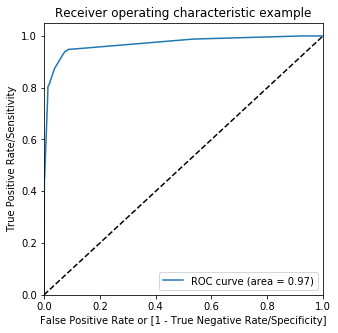

In [499]:

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

-->It is the best case as the curve passes through the upper left corner of the graph i.e larger Area under curve 

In [500]:
#optimal cut offs

#numbers=[x for x in range(0,100,10)]
numbers=[float (x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.018951         5182          0    1    0    0    0    0   
1          0        0.018951         8469          0    1    0    0    0    0   
2          0        0.005702         8382          0    1    0    0    0    0   
3          0        0.018951         8031          0    1    0    0    0    0   
4          1        0.991873         6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    1    1

In [501]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    #y_pred_comparison[n]= y_pred_comparison.Lead_Score.map(lambda x: 1 if x > n else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381728     1.000000     0.000000
0.1   0.1  0.926749     0.947822     0.913738
0.2   0.2  0.926914     0.945235     0.915602
0.3   0.3  0.930535     0.927124     0.932641
0.4   0.4  0.930864     0.927124     0.933174
0.5   0.5  0.930864     0.927124     0.933174
0.6   0.6  0.919177     0.821906     0.979233
0.7   0.7  0.917695     0.817163     0.979766
0.8   0.8  0.917860     0.817163     0.980032
0.9   0.9  0.916049     0.802070     0.986422


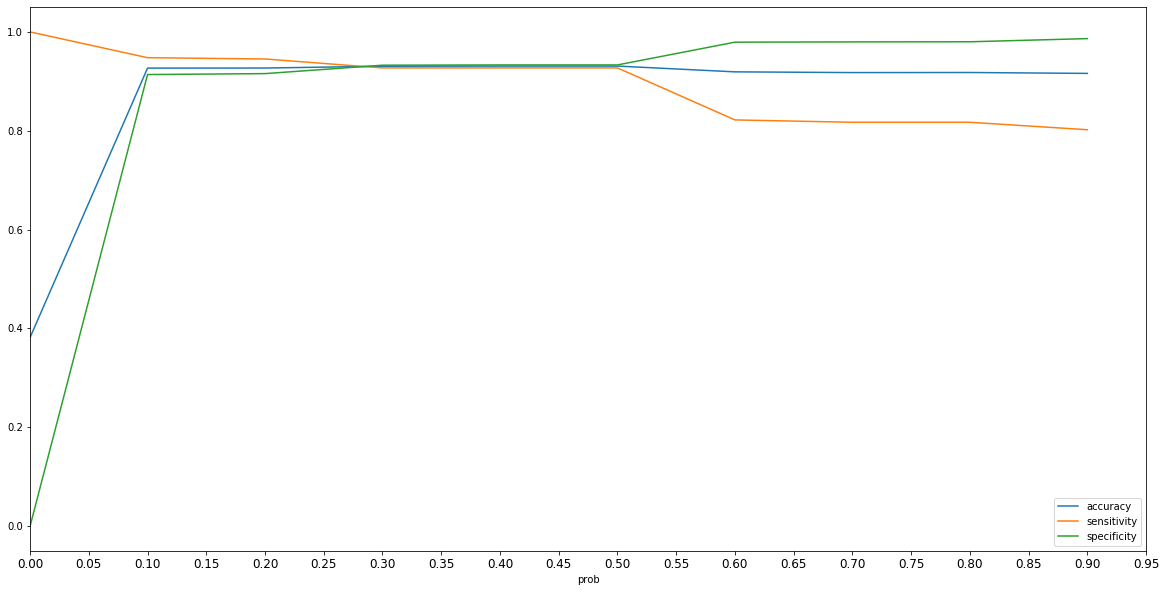

In [502]:
#plot

#cutoff_df.plot.line(x='score',y=['accuracy','sensitivity','specificity'])
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'],figsize=(20,10))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.show()


-->The optimum cut off threshold is 0.35 where the curves of accuracy, sensitivity and specificity intersect  and they all take a value of around 50%

Precision and recall

In [509]:
from sklearn.metrics import precision_score,recall_score


In [510]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8954602249062891

In [511]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.9271237602414834

#precision anf recall trade off

In [512]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       0
 3       0
 4       1
 5       1
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      1
 26      1
 27      0
 28      1
 29      1
 30      0
 31      1
 32      1
 33      1
 34      1
 35      0
 36      0
 37      0
 38      0
 39      1
 40      0
 41      0
 42      0
 43      0
 44      1
 45      1
 46      0
 47      0
 48      1
 49      0
 50      1
 51      0
 52      1
 53      0
 54      0
 55      1
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      1
 63      1
 64      0
 65      0
 66      1
 67      0
 68      1
 69      0
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      0
 77      0
 78      0
 79      1
 80      0
 81      0
 82      0
 83      1
 84      0
 85      1
 86      0
 87      1
 88      1
 89      0
 90      0

In [513]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

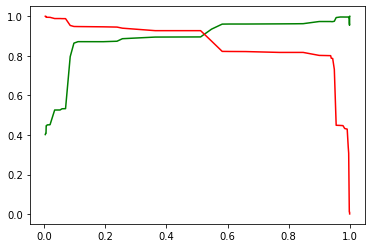

<Figure size 2160x1440 with 0 Axes>

In [514]:
plt.plot(thresholds,p[:-1],"g-")#precision
plt.plot(thresholds,r[:-1],"r-")#recall

#plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.figure(figsize=(30,20))
plt.show()

In [515]:
#Predicted conversion value based on the new cut off 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.018951         5182          0    1    0    0    0    0   
1          0        0.018951         8469          0    1    0    0    0    0   
2          0        0.005702         8382          0    1    0    0    0    0   
3          0        0.018951         8031          0    1    0    0    0    0   
4          1        0.991873         6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    1    1                1

In [516]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9305349794238683

In [517]:

confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_1

array([[3503,  253],
       [ 169, 2150]], dtype=int64)

In [518]:
TP1=confusion_1[1,1]
TN1=confusion_1[0,0]
FP1=confusion_1[0,1]
FN1=confusion_1[1,0]

In [519]:
#sensitivity
TP1/float(TP1+FN1)*100

92.71237602414834

In [520]:
#specificity
TN1/float(TN1+FP1)*100

93.26411075612353

In [521]:
#predicting conversion when actually not i.e. false positive rate
print(FP1/float(TN1+FP1)*100)

6.735889243876464


In [522]:
#predicting positive rate
print(TP1/float(TP1+FP1)*100)

89.471493965876


In [523]:
#predicting NEGATIVE rate
print(TN1/float(TN1+FN1)*100)

95.39760348583877


prediction on test set

In [524]:
X_test=X_test[X_train.columns]
X_test.head()

Asymmetrique Activity Index_03.Low  Lead Source_Welingak Website  \
475                                    0                             0   
2461                                   0                             1   
1890                                   0                             0   
6007                                   0                             0   
4052                                   0                             0   

      Reason for choosing a course_Unknown  Tags_Busy  \
475                                      0          0   
2461                                     0          0   
1890                                     1          0   
6007                                     0          0   
4052                                     0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  Tags_Unknown  \
475                         0                  1             0             0   
2461                        0                  0             0             1   
1890                        0                  0             0             1   
6007                        0                  0             0             0   
4052                        0                  0             1             0   

      Tags_Will revert after reading the email  Tags_switched off  \
475                                          0                  0   
2461                                         0                  0   
1890                                         0                  0   
6007                                         0                  0   
4052                                         0                  0   

      Lead Profile_Student of SomeSchool  Last Notable Activity_SMS Sent  \
475                                    0                               0   
2461                                   0                               1   
1890                                   0                               0   
6007                                   0                               0   
4052                                   0                               1   

      Last Notable Activity_Unsubscribed  
475                                    0  
2461                                   0  
1890                                   0  
6007                                   0  
4052                                   0

In [528]:
X_test_sm=sm.add_constant(X_test)#adding constant

In [529]:
y_test_pred=res.predict(X_test_sm)

In [530]:
y_test_pred[:10]

475     0.995278
2461    0.998613
1890    0.069673
6007    0.018951
4052    0.084904
7587    0.018951
2066    0.018951
7285    0.949720
3269    0.069673
4817    0.018951
dtype: float64

In [531]:
y_pred_1=pd.DataFrame(y_test_pred)

In [532]:
y_pred_1.head()

0
475   0.995278
2461  0.998613
1890  0.069673
6007  0.018951
4052  0.084904

In [533]:
y_test_df=pd.DataFrame(y_test)#converting to dataframe

In [535]:
y_test_df['Lead Number']=y_test_df.index  #adding the variable lead number

In [536]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [537]:
y_test_df.shape

(2604, 2)

In [538]:
y_pred_1.shape

(2604, 1)

In [539]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1) #concatinating converted probabilities with converted and lead number

In [164]:
y_pred_final.head()

Converted  Lead Number         0
0          1          475  0.995278
1          1         2461  0.998613
2          0         1890  0.069673
3          0         6007  0.018951
4          0         4052  0.084904

In [165]:
y_pred_final=y_pred_final.rename(columns={0:'Converted_Prob'}) #renaming column



In [167]:
y_pred_final.head()

Converted  Lead Number  Converted_Prob
0          1          475        0.995278
1          1         2461        0.998613
2          0         1890        0.069673
3          0         6007        0.018951
4          0         4052        0.084904

In [168]:
#Based on the cut off 0.35 assigning 1 and 0

y_pred_final['final_predicted']=y_pred_final.Converted_Prob.map(lambda x:1 if x>0.35 else 0)
y_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          1          475        0.995278                1
1          1         2461        0.998613                1
2          0         1890        0.069673                0
3          0         6007        0.018951                0
4          0         4052        0.084904                0

In [169]:
y_pred_final.shape

(2604, 4)

In [171]:
#accuracy checking
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.9193548387096774

In [172]:
#confusion matrix

confusion2=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion2

array([[1468,  123],
       [  87,  926]], dtype=int64)

In [173]:
TP2=confusion2[1,1]
TN2=confusion2[0,0]
FP2=confusion2[0,1]

FN2=confusion2[1,0]


In [174]:
#SENSITIVITY

TP2/float(TP2+FN2)*100

91.4116485686081

In [175]:
#SPECIFICITY
TN2/(TN2+FP2)*100

92.26901319924575

In [177]:
y_train_pred_final.shape #train set

(6075, 15)

In [178]:
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.018951         5182          0    1    0    0    0    0   
1          0        0.018951         8469          0    1    0    0    0    0   
2          0        0.005702         8382          0    1    0    0    0    0   
3          0        0.018951         8031          0    1    0    0    0    0   
4          1        0.991873         6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    1    1                1

In [179]:
y_pred_final.shape#test set

(2604, 4)

In [180]:
y_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          1          475        0.995278                1
1          1         2461        0.998613                1
2          0         1890        0.069673                0
3          0         6007        0.018951                0
4          0         4052        0.084904                0

In [181]:
data.shape

(8679, 121)

In [182]:
y_train_pred_final=y_train_pred_final[['Converted','Lead Number','Converted_Prob','final_predicted']]
#y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].apply(lambda x : round(x*100))
y_train_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          0         5182        0.018951                0
1          0         8469        0.018951                0
2          0         8382        0.005702                0
3          0         8031        0.018951                0
4          1         6712        0.991873                1

In [183]:
#combining train and test data along rows using append 
lead_conversion_final_pred = y_train_pred_final.append(y_pred_final)
lead_conversion_final_pred.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          0         5182        0.018951                0
1          0         8469        0.018951                0
2          0         8382        0.005702                0
3          0         8031        0.018951                0
4          1         6712        0.991873                1

In [184]:
lead_conversion_final_pred.shape

(8679, 4)

In [185]:
confusion_final = metrics.confusion_matrix(lead_conversion_final_pred.Converted, lead_conversion_final_pred.final_predicted)
confusion_final

array([[4971,  376],
       [ 256, 3076]], dtype=int64)

In [186]:
TP3=confusion_final[1,1]
TN3=confusion_final[0,0]
FP3=confusion_final[0,1]

FN3=confusion_final[1,0]


In [187]:
metrics.accuracy_score(lead_conversion_final_pred.Converted, lead_conversion_final_pred.final_predicted)

0.9271805507546952

In [188]:
#SENSITIVITY

TP3/float(TP3+FN3)*100

92.31692677070828

In [189]:
#SPECIFICITY
TN3/(TN3+FP3)*100

92.96801945015896

In [190]:
#predicting conversion when actually not i.e. false positive rate
print(FP3/float(TN3+FP3)*100)

7.031980549841032


In [191]:
#assigning lead score to the entire dataset
lead_conversion_final_pred['Lead_Score'] = lead_conversion_final_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_conversion_final_pred.head()

Converted  Lead Number  Converted_Prob  final_predicted  Lead_Score
0          0         5182        0.018951                0           2
1          0         8469        0.018951                0           2
2          0         8382        0.005702                0           1
3          0         8031        0.018951                0           2
4          1         6712        0.991873                1          99

In [195]:
#top 100 leads based on lead score
lead_conversion_final_pred.nlargest(100,['Lead_Score'])

Converted  Lead Number  Converted_Prob  final_predicted  Lead_Score
5            1         6332        0.996738                1         100
31           1         5685        0.996738                1         100
32           1         4520        0.996738                1         100
39           1         4776        0.996738                1         100
66           1         4775        0.996738                1         100
70           1         7574        0.996738                1         100
72           1         4031        0.996738                1         100
79           1         6460        0.996738                1         100
95           1         1425        0.996738                1         100
104          1         7490        0.996738                1         100
122          1         2756        0.996738                1         100
128          1         6984        0.996738                1         100
157          0         8536        0.996738                1         100
165          1         1307        0.996738                1         100
171          1         7738        0.996738                1         100
175          1         7289        0.996738                1         100
176          1          949        0.999807                1         100
177          1         8888        0.996738                1         100
181          1         3740        0.995278                1         100
182          1         6475        0.996738                1         100
185          1         3083        0.996738                1         100
194          1         2979        0.998613                1         100
195          1         5860        0.995278                1         100
203          1         4934        0.996738                1         100
206          1         3172        0.996738                1         100
227          1         5895        0.996738                1         100
233          1         3952        0.996738                1         100
249          1         6932        0.998754                1         100
252          1         3532        0.996738                1         100
263          1         7941        0.996738                1         100
276          1         2673        0.996738                1         100
284          1         6729        0.998613                1         100
293          1         2886        0.996738                1         100
296          1         2061        0.996738                1         100
297          1         2725        0.995278                1         100
302          1         2868        0.996738                1         100
308          1         3643        0.996738                1         100
317          1         1263        0.996738                1         100
349          1         7424        0.996738                1         100
357          1         1424        0.996738                1         100
367          1         5659        0.996738                1         100
395          1         9172        0.995278                1         100
411          1         3090        0.996738                1         100
412          1         3207        0.996738                1         100
416          1         5729        0.996738                1         100
424          1         8592        0.998613                1         100
428          1         8304        0.996738                1         100
439          1         4984        0.996738                1         100
445          1         5506        0.996738                1         100
455          1         7236        0.996738                1         100
467          1         7486        0.996738                1         100
474          1         7725        0.998613                1         100
475          1         8177        0.996738                1         100
482          1         6768        0.996738                1   

In [199]:
#checking the leads that are yet not converted

leads_not_converted= lead_conversion_final_pred.loc[lead_conversion_final_pred['Converted'] == 0]
leads_not_converted

Converted  Lead Number  Converted_Prob  final_predicted  Lead_Score
0             0         5182        0.018951                0           2
1             0         8469        0.018951                0           2
2             0         8382        0.005702                0           1
3             0         8031        0.018951                0           2
6             0          458        0.069673                0           7
8             0         5935        0.018951                0           2
9             0         4201        0.005702                0           1
10            0         2671        0.069673                0           7
12            0         2552        0.005702                0           1
14            0         3955        0.069673                0           7
15            0         8042        0.949720                1          95
16            0         6646        0.001425                0           0
17            0         4079        0.069673                0           7
18            0         8700        0.009423                0           1
19            0         8046        0.001977                0           0
20            0         5731        0.069673                0           7
22            0         7645        0.069673                0           7
23            0         5203        0.005702                0           1
27            0          919        0.001977                0           0
30            0         6233        0.005702                0           1
35            0         8900        0.084904                0           8
36            0         7939        0.069673                0           7
37            0         7380        0.069673                0           7
38            0         7135        0.069673                0           7
40            0         7530        0.005702                0           1
41            0         1319        0.069673                0           7
42            0         7460        0.018951                0           2
43            0         1078        0.001977                0           0
46            0          383        0.069673                0           7
47            0         1940        0.001425                0           0
49            0         4630        0.051636                0           5
51            0          166        0.005702                0           1
53            0         6105        0.069673                0           7
54            0          525        0.000588                0           0
56            0         5046        0.069673                0           7
59            0         1653        0.069673                0           7
60            0         5338        0.069673                0           7
61            0         1461        0.005702                0           1
64            0         7066        0.018951                0           2
65            0          630        0.069673                0           7
67            0         7896        0.005702                0           1
69            0         5544        0.069673                0           7
71            0         3335        0.069673                0           7
73            0           74        0.069673                0           7
74            0         5108        0.069673                0           7
75            0         8613        0.005702                0           1
76            0         9011        0.511872                1          51
77            0         3134        0.069673                0           7
78            0           38        0.005702                0           1
80            0         7681        0.084904                0           8
81            0         6035        0.069673                0           7
82            0         3928        0.511872                1          51
84            0         9127        0.069673                0           7
86        

In [200]:
leads_not_converted.shape

(5347, 5)

In [203]:
leads_not_converted_to_conversion=leads_not_converted.loc[leads_not_converted['final_predicted'] == 1]
leads_not_converted_to_conversion.shape

(376, 5)

--->376 leads  are predicted to be converted

In [210]:
#list of leads who are most likely to convert based on converted probability and lead score 

leads_not_converted_to_conversion.sort_values(by='Lead_Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Converted  Lead Number  Converted_Prob  final_predicted  Lead_Score
2334          0         6413        0.999494                1         100
157           0         8536        0.996738                1         100
1090          0         6684        0.996738                1         100
161           0         8664        0.995278                1         100
335           0         3188        0.996738                1         100
862           0         2359        0.991873                1          99
36            0         3601        0.978028                1          98
4788          0          746        0.955772                1          96
1450          0          534        0.955772                1          96
5359          0         4820        0.955772                1          96
1100          0         8535        0.949720                1          95
2459          0         3101        0.949720                1          95
1811          0         6587        0.949720                1          95
5918          0         3610        0.949720                1          95
2759          0         6830        0.949720                1          95
2701          0         8960        0.949720                1          95
2663          0         3825        0.949720                1          95
715           0         7144        0.949720                1          95
2585          0          708        0.949720                1          95
6067          0         6012        0.949720                1          95
17            0         2451        0.949720                1          95
2503          0         5340        0.949720                1          95
1514          0         2009        0.949720                1          95
583           0         2463        0.949720                1          95
1779          0         7302        0.949720                1          95
1480          0         3712        0.949720                1          95
2928          0         8054        0.949720                1          95
255           0         3220        0.949720                1          95
1227          0         8343        0.949720                1          95
311           0         2063        0.949720                1          95
2167          0          233        0.949720                1          95
1848          0         8983        0.949720                1          95
1157          0         9222        0.949720                1          95
1585          0         3586        0.949720                1          95
1995          0         8851        0.949720                1          95
5658          0         9230        0.949720                1          95
15            0         8042        0.949720                1          95
3571          0         8631        0.949720                1          95
422           0         8062        0.949720                1          95
2510          0         5104        0.949720                1          95
4359          0         2291        0.949720                1          95
3959          0         5616        0.949720                1          95
167           0         7727        0.949720                1          95
2453          0         8610        0.949720                1          95
2374          0          710        0.949720                1          95
3855          0         9184        0.949720                1          95
4626          0         4182        0.949720                1          95
3751          0         5636        0.949720                1          95
2227          0         6572        0.949720                1          95
4756          0         2113        0.949720                1          95
4766          0         8057        0.949720                1          95
354           0         1356        0.949720                1          95
2932          0         1334        0.949720                1          95
842       

In [542]:
pred_conversion=lead_conversion_final_pred['final_predicted'].loc[lead_conversion_final_pred['final_predicted']==1].count()
total_values=lead_conversion_final_pred.shape[0]
conversion_rate=(pred_conversion/total_values)*100
conversion_rate

39.77416753082152

In [540]:
#Determining top 3 variables

feature_var=res.params[1:]
feature_var

Asymmetrique Activity Index_03.Low         -2.277573
Lead Source_Welingak Website                3.748278
Reason for choosing a course_Unknown       -2.639224
Tags_Busy                                   2.879427
Tags_Closed by Horizzon                     8.751149
Tags_Lost to EINS                           9.297497
Tags_Ringing                               -1.214461
Tags_Unknown                                3.994260
Tags_Will revert after reading the email    6.885325
Tags_switched off                          -1.747463
Lead Profile_Student of SomeSchool         -2.605173
Last Notable Activity_SMS Sent              2.783714
Last Notable Activity_Unsubscribed          1.162430
dtype: float64

-->Top 3 variables: Tags_Closed by Horizzon (8.7), Tags_Lost to EINS(9.3), Tags_Will revert after reading the email(6.9)